In [9]:
library(dplyr)
library(ggplot2)

In [2]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [3]:
## Marc's

In [4]:
std_folder = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Std/")
gauss_folder = paste0(revision_folder,"limix_qtl_pipeline_Gtest/Gtest_10MOFA/results_mj/TestOutChr19_Gauss/")

In [5]:
res_filename = paste0(std_folder,"qtl_results_all.txt")
res_filename = paste0(gauss_folder,"qtl_results_all.txt")

In [6]:
res = read.csv(res_filename, sep="\t")
nrow(res)
head(res,2)

[1] 997544

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000083844,19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,2.369113,62.11524,0.8,19,57703077,G,1,0.4141414,1
ENSG00000083844,19_57703209_T_C,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,99,2.369113,62.11524,0.8,19,57703209,C,1,0.4141414,1


In [7]:
## Anna's

In [8]:
crm_file = paste0(revision_folder, "CRM_association/summary.csv")

In [10]:
crm = read.csv(crm_file, row.names=1)
colnames(crm) = c("feature_id", "n_snps", "feature_chromosome","p_value","snp_id","p_value_Bonferroni") 
nrow(crm)
head(crm,2)

[1] 10003258

,feature_id,n_snps,feature_chromosome,p_value,snp_id,p_value_Bonferroni
0,ENSG00000250462,909,17,0.5215900,17_28857239_G_A,1
1,ENSG00000250462,909,17,0.6535075,17_28857794_C_T,1


In [ ]:
for (i in 1:22){
    print(c(i, length(unique(crm[crm$feature_chromosome == i,"feature_id"])), nrow(crm[crm$feature_chromosome == i,])))
}

In [11]:
for (i in 1:22){
    print(c(i, length(unique(crm[crm$feature_chromosome == i,"feature_id"])), nrow(crm[crm$feature_chromosome == i,])))
}

[1]      1   1075 900729
[1]      2    726 724029
[1]      3    645 683196
[1]      4    390 440016
[1]      5    495 516933
[1]      6    523 595765
[1]      7    524 531165
[1]      8    385 393530
[1]      9    435 432338
[1]     10    410 433590
[1]     11    601 539645
[1]     12    584 520458
[1]     13    191 209960
[1]     14    345 333461
[1]     15    368 337971
[1]     16    512 445543
[1]     17    646 492841
[1]     18    164 179367
[1]     19    830 672590
[1]     20    280 258036
[1]    21    93 99425
[1]     22    271 262670


In [12]:
res2 = inner_join(res, crm, by = c("snp_id","feature_id"), suffix = c(".M",".A"))
nrow(res2)
head(res2,2)

[1] 406389

feature_id,snp_id,p_value.M,beta,beta_se,empirical_feature_p_value,feature_chromosome.M,feature_start,feature_end,n_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,n_snps,feature_chromosome.A,p_value.A,p_value_Bonferroni
ENSG00000083844,19_57703077_T_G,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,...,19,57703077,G,1,0.4141414,1,988,19,2.333279e-06,0.00230528
ENSG00000083844,19_57703209_T_C,7.682972e-06,-0.08074288,0.01804454,4.813915e-09,19,57702868,57724724,27598,...,19,57703209,C,1,0.4141414,1,988,19,2.333279e-06,0.00230528


In [13]:
## Gauss

In [14]:
cor.test(-log10(res2$p_value.M), -log10(res2$p_value.A))


	Pearson's product-moment correlation

data:  -log10(res2$p_value.M) and -log10(res2$p_value.A)
t = 1209.2, df = 406387, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8839205 0.8852579
sample estimates:
     cor 
0.884591 


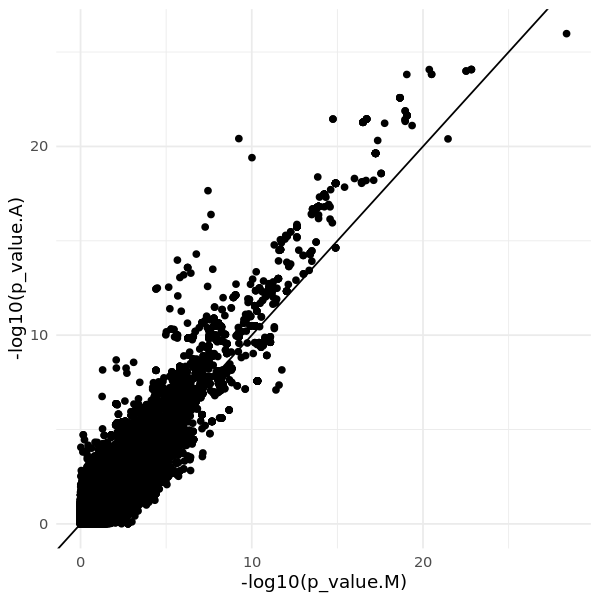

In [15]:
options(repr.plot.width = 5, repr.plot.height = 5) 
p = ggplot(res2, aes(x=-log10(p_value.M), y=-log10(p_value.A))) + geom_point() + geom_abline()
p + theme_minimal()

In [16]:
#### Std

In [87]:
cor.test(-log10(res2$p_value.M), -log10(res2$p_value.A))


	Pearson's product-moment correlation

data:  -log10(res2$p_value.M) and -log10(res2$p_value.A)
t = 479.25, df = 21983, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9541572 0.9564669
sample estimates:
      cor 
0.9553266 


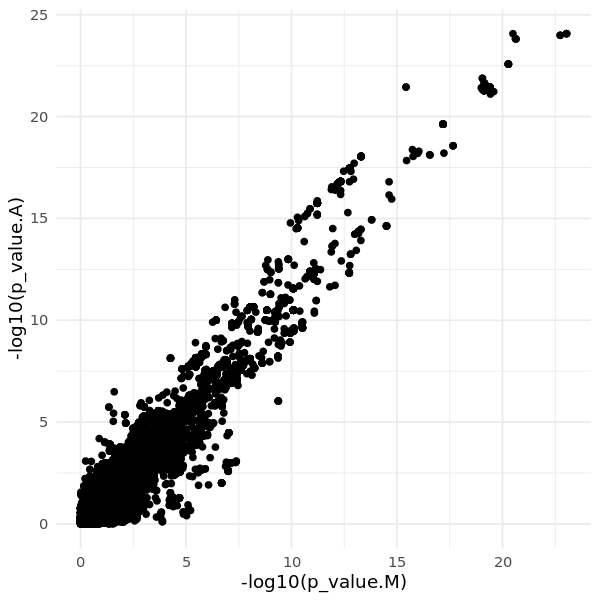

In [88]:
options(repr.plot.width = 5, repr.plot.height = 5) 
ggplot(res2, aes(x=-log10(p_value.M), y=-log10(p_value.A))) + geom_point() + theme_minimal()